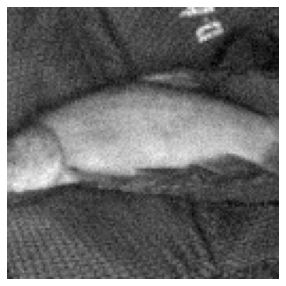

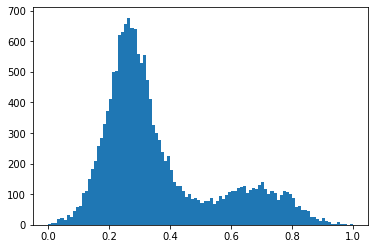

In [60]:
import torch
import torch.fft as fft
import matplotlib.pyplot as plt

from denoising_diffusion_pytorch.dataset import KSpaceDataset
from denoising_diffusion_pytorch.utils import plot_imgs


k_space = KSpaceDataset('data')
idx = torch.randint(low=0, high=len(k_space), size=(1,))
img_fft = k_space[idx]

img_fft += torch.randn_like(img_fft) * 1e-3
img_complex = img_fft[0] + 1j * img_fft[1]
img_complex = fft.ifftshift(fft.ifft2(fft.fftshift(img_complex), norm='forward'))

plt_img = torch.abs(img_complex)

plt_img = (plt_img - plt_img.min())/(plt_img.max() - plt_img.min())

plot_imgs(plt_img, fig_size=(5, 5))
plt.hist(plt_img.flatten().numpy(), bins=100)
plt.show()

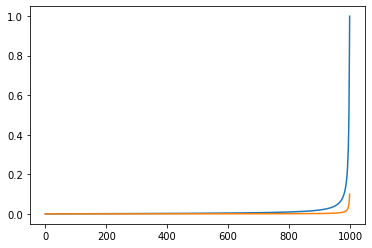

In [2]:
from denoising_diffusion_pytorch import cosine_beta_schedule

betas = cosine_beta_schedule(timesteps=1000)
plt.plot(range(1000), betas)
betas *= 0.1
plt.plot(range(1000), betas)
plt.show()

torch.Size([11, 1, 128, 128])


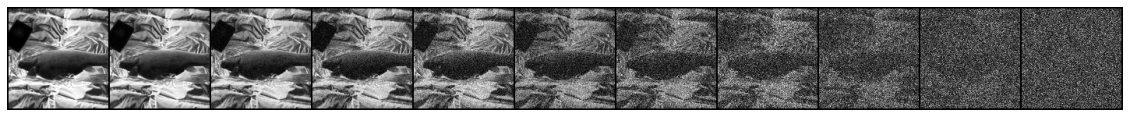

In [4]:
img_fft = k_space[0]

counter = 0
imgs = []
for beta in betas:
    img_fft *= torch.sqrt(1 - torch.tensor(beta))
    img_fft += torch.randn_like(img_fft) * beta

    if counter % 100 == 0 or counter == 999:
        img_complex = img_fft[0] + 1j * img_fft[1]
        img_complex = fft.ifftshift(fft.ifft2(fft.fftshift(img_complex), norm='forward'))
        plt_img = torch.abs(img_complex)
        plt_img = (plt_img - plt_img.min())/(plt_img.max() - plt_img.min())
        imgs.append(plt_img.unsqueeze(0))

    counter += 1

print(torch.stack(imgs).shape)
plot_imgs(torch.stack(imgs), ncols=11, fig_size=(20, 5))